In [1]:
import pandas as pd
import datapackage
from pathlib import Path
import matplotlib.pyplot as plt




# Read Universal_Top_Spotify_songs.csv
spotify_top = pd.read_csv('/Users/ivanchavez/Downloads/universal_top_spotify_songs.csv')


# Import List of country codes
data_url = 'https://datahub.io/core/country-list/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)


                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]
                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]


In [2]:
data = data.rename(columns={"Code":"country"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     249 non-null    object
 1   country  248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [3]:
spotify_top_complete = pd.merge(data,spotify_top, on="country")
spotify_top_complete.head()

spotify_top_complete['danceability'].min()

0.222

In [4]:
spotify_top.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3LmvfNUQtglbTrydsdIqFU,We Belong Together,Mariah Carey,50,0,0,ZA,24/10/23,73,False,...,0,-7.890,1,0.0601,0.0339,0.000000,0.090,0.762,139.986,4
1,0JXXNGljqupsJaZsgSbMZV,Sure Thing,Miguel,49,0,1,ZA,24/10/23,90,False,...,11,-8.127,0,0.1000,0.0267,0.000307,0.191,0.498,81.001,4
2,6HmiaxYKrzq3sU2M0eFDg2,BETTER NOW,A-Reece,48,0,2,ZA,24/10/23,50,True,...,1,-7.524,1,0.1660,0.1300,0.000031,0.121,0.725,83.001,4
3,4rXLjWdF2ZZpXCVTfWcshS,fukumean,Gunna,47,0,3,ZA,24/10/23,96,True,...,1,-6.747,0,0.0903,0.1190,0.000000,0.285,0.220,130.001,4
4,4iZ4pt7kvcaH6Yo8UoZ4s2,Snooze,SZA,46,0,4,ZA,24/10/23,92,True,...,5,-7.231,1,0.1320,0.1410,0.000000,0.110,0.392,143.008,4


In [5]:
spotify_top.shape

(25473, 25)

In [6]:
#spotify_top_complete_v1 = spotify_top_complete[spotify_top_complete['country'].notna()]
spotify_top_complete_v1 = spotify_top_complete.dropna(subset=['country','name'])
spotify_top_complete_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25122 entries, 0 to 25472
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                25122 non-null  object 
 1   country             25122 non-null  object 
 2   spotify_id          25122 non-null  object 
 3   name                25122 non-null  object 
 4   artists             25122 non-null  object 
 5   daily_rank          25122 non-null  int64  
 6   daily_movement      25122 non-null  int64  
 7   weekly_movement     25122 non-null  int64  
 8   snapshot_date       25122 non-null  object 
 9   popularity          25122 non-null  int64  
 10  is_explicit         25122 non-null  bool   
 11  duration_ms         25122 non-null  int64  
 12  album_name          25122 non-null  object 
 13  album_release_date  25122 non-null  object 
 14  danceability        25122 non-null  float64
 15  energy              25122 non-null  float64
 16  key 

In [7]:
spotify_top_complete_v2 = spotify_top_complete_v1.loc[spotify_top_complete_v1['snapshot_date'] == '24/10/23']
spotify_top_complete_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 25172
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3577 non-null   object 
 1   country             3577 non-null   object 
 2   spotify_id          3577 non-null   object 
 3   name                3577 non-null   object 
 4   artists             3577 non-null   object 
 5   daily_rank          3577 non-null   int64  
 6   daily_movement      3577 non-null   int64  
 7   weekly_movement     3577 non-null   int64  
 8   snapshot_date       3577 non-null   object 
 9   popularity          3577 non-null   int64  
 10  is_explicit         3577 non-null   bool   
 11  duration_ms         3577 non-null   int64  
 12  album_name          3577 non-null   object 
 13  album_release_date  3577 non-null   object 
 14  danceability        3577 non-null   float64
 15  energy              3577 non-null   float64
 16  key  

In [8]:

countries = ['MX','US']
spotify_top_complete_v3 =  spotify_top_complete_v2[spotify_top_complete_v2['country'].isin(countries)]
spotify_top_complete_v3
                                

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
13923,Mexico,MX,1AZbs0L3SkXe625DKp37KQ,Julietota,LATIN MAFIA,50,0,0,24/10/23,85,...,5,-3.262,0,0.1990,0.2830,0.000126,0.0972,0.302,82.944,4
13924,Mexico,MX,4qSEvFGCpde73gqIuq3sho,HIBIKI,"Bad Bunny, Mora",49,0,1,24/10/23,91,...,6,-5.605,0,0.0706,0.6040,0.000000,0.1180,0.528,119.935,4
13925,Mexico,MX,3NhstUmrlhaN1M6hP8zMbb,BABY NUEVA,Bad Bunny,48,0,2,24/10/23,89,...,10,-4.816,0,0.0616,0.5040,0.000505,0.3280,0.359,117.924,4
13926,Mexico,MX,179TZwPk0txEvjkraVTVKo,El Precio De La Soledad,Alfredo Olivas,47,0,3,24/10/23,82,...,10,-3.665,1,0.1800,0.1290,0.000003,0.0840,0.909,95.426,4
13927,Mexico,MX,6XSqqQIy7Lm7SnwxS4NrGx,Classy 101,"Feid, Young Miko",46,0,4,24/10/23,93,...,11,-4.790,1,0.1590,0.1450,0.000000,0.1200,0.672,100.065,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,24/10/23,94,...,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,24/10/23,95,...,4,-5.009,0,0.0680,0.1500,0.000402,0.5800,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,24/10/23,88,...,2,-7.683,0,0.1940,0.2550,0.000004,0.1120,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,24/10/23,100,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4


In [9]:
spotify_top_complete_v2['Name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bolivia, Plurinational State of', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan, Province of China', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'U

In [10]:
# Asia =  Korea, Republic of , Taiwan , Singapore
# LatinAmerica = Mexico , Colombia , Chile
# Europa = France, United Kingdom ,  Romania
# North America = United States , Canada

In [11]:
countries_top1=['KR','TW','SG','MX','CO','CL','FR','GB','RO','US','CA']
spotify_top1_complete=spotify_top_complete_v2[spotify_top_complete_v2['country'].isin(countries_top1)]
#spotify_top_complete_asia.info()
spotify_top1_complete




,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2800,Canada,CA,0PAcdVzhPO4gq1Iym9ESnK,Thinkin’ Bout Me,Morgan Wallen,50,0,0,24/10/23,86,...,3,-5.775,0,0.0308,0.492000,0.000000,0.117,0.429,139.971,4
2801,Canada,CA,67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),"Travis Scott, Drake",49,0,1,24/10/23,91,...,7,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,4
2802,Canada,CA,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,48,0,2,24/10/23,93,...,10,-2.810,1,0.0336,0.049500,0.017700,0.101,0.398,124.053,4
2803,Canada,CA,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",47,0,3,24/10/23,90,...,0,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,165.921,4
2804,Canada,CA,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,46,0,4,24/10/23,92,...,7,-7.582,1,0.0919,0.492000,0.000016,0.118,0.453,68.534,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,24/10/23,94,...,0,-7.746,1,0.0459,0.554000,0.000002,0.102,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,24/10/23,95,...,4,-5.009,0,0.0680,0.150000,0.000402,0.580,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,24/10/23,88,...,2,-7.683,0,0.1940,0.255000,0.000004,0.112,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,24/10/23,100,...,9,-5.707,1,0.1570,0.117000,0.000021,0.105,0.564,169.994,4


In [34]:
spotify_top1=spotify_top1_complete.loc[spotify_top1_complete['daily_rank'] == 1]
spot = spotify_top1[['Name','name','artists','danceability','energy','acousticness','instrumentalness','loudness','speechiness','valence']]
spot.reset_index()

,index,Name,name,artists,danceability,energy,acousticness,instrumentalness,loudness,speechiness,valence
0,2849,Canada,IDGAF (feat. Yeat),"Drake, Yeat",0.663,0.670,0.04640,0.000089,-8.399,0.2710,0.138
1,3199,Chile,ANDO,"Jere Klein, Gittobeatz",0.844,0.598,0.00362,0.002140,-7.950,0.0616,0.393
2,3549,Colombia,PERRO NEGRO,"Bad Bunny, Feid",0.911,0.778,0.08870,0.000022,-2.248,0.2620,0.345
3,7049,France,Petit génie,"Jungeli, Imen Es, Alonzo, Abou Debeing, Lossa",0.800,0.581,0.12600,0.000004,-5.925,0.2440,0.966
4,12299,"Korea, Republic of",Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
5,13972,Mexico,Que Onda,"Calle 24, Chino Pacas, Fuerza Regida",0.808,0.944,0.18300,0.000001,-4.863,0.0408,0.937
6,19222,Romania,Cleopatra,IDK,0.693,0.553,0.15000,0.000000,-8.580,0.2320,0.679
7,19922,Singapore,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
8,22022,"Taiwan, Province of China",Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",0.802,0.832,0.31100,0.000000,-4.107,0.0434,0.890
9,23772,United Kingdom,Strangers,Kenya Grace,0.628,0.523,0.70100,0.002740,-8.307,0.0946,0.416


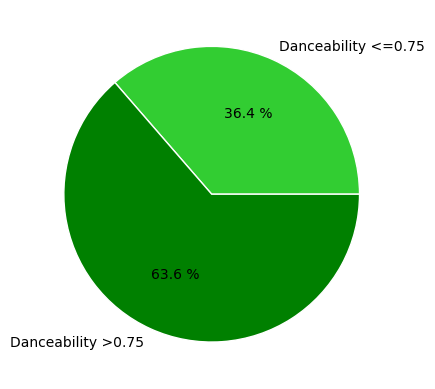

In [13]:
#Songs with danceability less than .75
spotify_top1_dance1=spotify_top1.loc[(spotify_top1['danceability']<=0.75)& spotify_top1['danceability']>0.5]
dance1=(spotify_top1_dance1.shape[0])/11

#Songs with danceability bigger than .75
spotify_top1_dance2=spotify_top1.loc[(spotify_top1['danceability']>0.75)]
dance2=(spotify_top1_dance2.shape[0])/11

#visualization
dance_val= [dance1,dance2]
dance_val
label = ['Danceability <=0.75', 'Danceability >0.75']
colores = ["#32CD32", "#008000"]
plt.pie(dance_val, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#36.4% of the top 1 songs are below .75 in the danceability measure


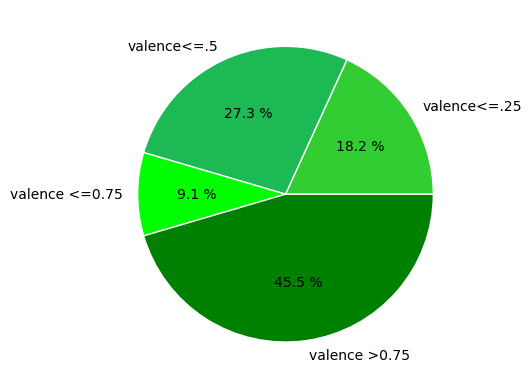

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
7049,France,FR,6z0GwK274ToNmvxfyYPuHw,Petit génie,"Jungeli, Imen Es, Alonzo, Abou Debeing, Lossa",1,0,49,24/10/23,83,...,1,-5.925,0,0.2440,0.126,0.000004,0.2240,0.966,126.046,4
12299,"Korea, Republic of",KR,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,24/10/23,98,...,11,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4
13972,Mexico,MX,6uIIdjYTxxpWOyWuVXrKQO,Que Onda,"Calle 24, Chino Pacas, Fuerza Regida",1,0,49,24/10/23,94,...,10,-4.863,0,0.0408,0.183,0.000001,0.1380,0.937,124.934,3
19922,Singapore,SG,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,24/10/23,98,...,11,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4
22022,"Taiwan, Province of China",TW,7x9aauaA9cu6tyfpHnqDLo,Seven (feat. Latto) (Explicit Ver.),"Jung Kook, Latto",1,0,49,24/10/23,98,...,11,-4.107,1,0.0434,0.311,0.000000,0.0815,0.890,124.997,4


In [14]:
#Songs with valence less than .25
spotify_top1_valence1=spotify_top1.loc[(spotify_top1['valence']<=0.25)& spotify_top1['valence']>0]
valence1=(spotify_top1_valence1.shape[0])/11

#Songs with valence less than .5
spotify_top1_valence2=spotify_top1.loc[(spotify_top1['valence']<=0.5)& (spotify_top1['valence']>0.25)]
valence2=(spotify_top1_valence2.shape[0])/11

#Songs with valence less than .75
spotify_top1_valence3=spotify_top1.loc[(spotify_top1['valence']<=0.75)& (spotify_top1['valence']>0.5)]
valence3=(spotify_top1_valence3.shape[0])/11

#Songs with valence less than 1
spotify_top1_valence4=spotify_top1.loc[(spotify_top1['valence']<=1)& (spotify_top1['valence']>0.75)]
valence4=(spotify_top1_valence4.shape[0])/11

#visualization
valence_val= [valence1,valence2,valence3,valence4]
valence_val
label = ['valence<=.25','valence<=.5','valence <=0.75', 'valence >0.75']
colores = ["#32CD32", "#1DB954","#00FF00","#008000"]
plt.pie(valence_val, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#36.4% of the top 1 songs are below .75 in the valence measure


spotify_top1_valence4

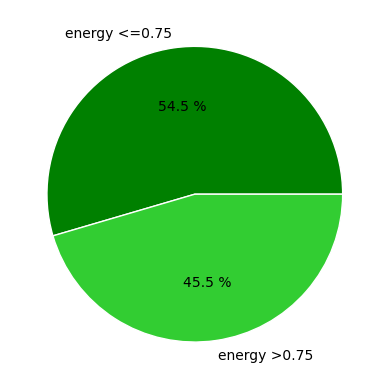

In [15]:
#Songs with energy less than .75
spotify_top1_energy3=spotify_top1.loc[(spotify_top1['energy']<=0.75)& (spotify_top1['energy']>0.5)]
energy3=(spotify_top1_energy3.shape[0])/11

#Songs with energy less than 1
spotify_top1_energy4=spotify_top1.loc[(spotify_top1['energy']<=1)& (spotify_top1['energy']>0.75)]
energy4=(spotify_top1_energy4.shape[0])/11

#visualization
energy_ene= [energy3,energy4]
energy_ene
label = ['energy <=0.75', 'energy >0.75']
colores = ["#008000", "#32CD32"]
plt.pie(energy_ene, labels = label,autopct='%0.1f %%',colors = colores,
       wedgeprops = {"linewidth": 1, "edgecolor": "white"})
plt.show()
#36.4% of the top 1 songs are below .75 in the valence measure


